In [184]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn import tree
import matplotlib.pyplot as plt

# LAB 7

## DOWNLOAD THE DATA

In [185]:
data = pd.read_csv('data/iris.data', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [186]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [187]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

## BAYES

In [189]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print((y_test != y_pred).sum())

3


In [190]:
gnb.score(X_test, y_test)

0.96

In [191]:
def estimate_clf(clf):
    size_range = np.arange(0.05, 0.95, 0.05)
    test_results = []

    for size in size_range:
        X_train, X_test, y_train, y_test =\
            train_test_split(X, Y, test_size=size, random_state=630741)

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        fault = (y_test != y_pred).sum()
        score = clf.score(X_test, y_test) * 100

        test_results.append([size, fault, score])

    return np.array(test_results)

In [192]:
def show_result(clf, results):
    plt.plot(test_results[:,0], test_results[:,1], label='# of faults')
    plt.plot(test_results[:,0], test_results[:,2], label='% of score')
    plt.title(clf.__name__)
    plt.legend()
    plt.show()

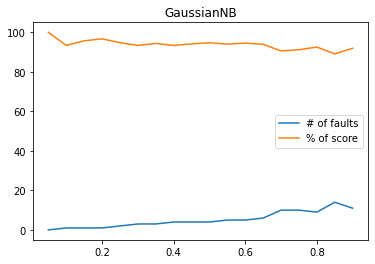

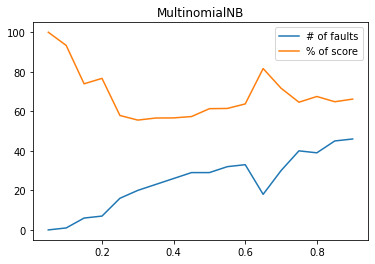

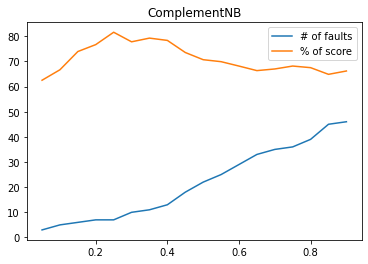

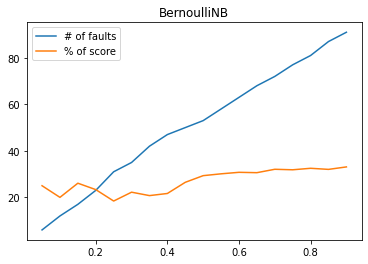

In [193]:
for nb in [GaussianNB, MultinomialNB, ComplementNB, BernoulliNB]:
    test_results = estimate_clf(nb())
    show_result(nb, test_results)

## TREE CLASSIFIERS

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [195]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print((y_test != y_pred).sum())

5


In [196]:
clf.score(X_test, y_test)

0.9333333333333333

In [197]:
print(clf.get_n_leaves(), clf.get_depth())

4 3


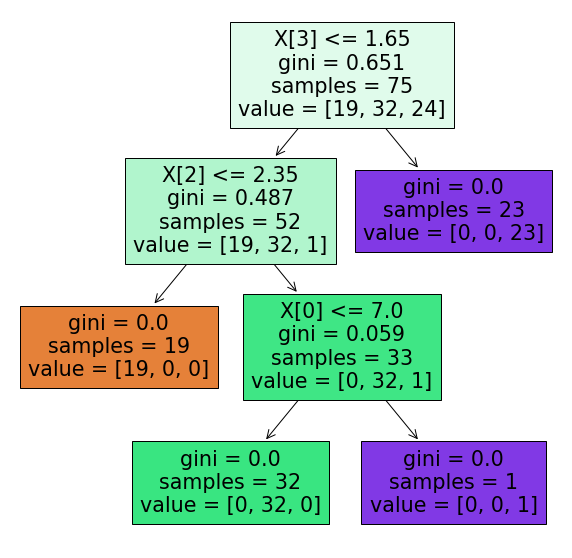

In [198]:
plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(clf, filled=True)
plt.show()

In [199]:
clf = tree.DecisionTreeClassifier

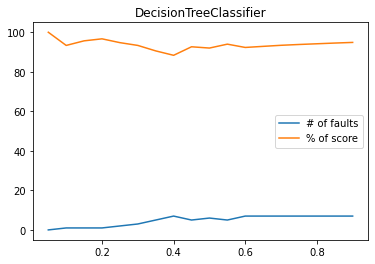

In [200]:
test_results = estimate_clf(clf())
show_result(clf, test_results)

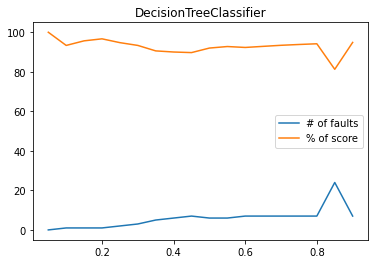

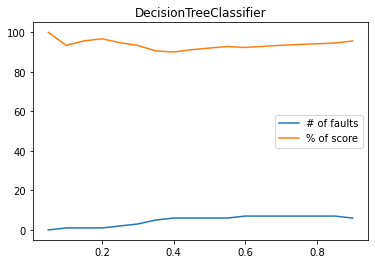

In [201]:
for criterion in ['gini', 'entropy']:
    test_results = estimate_clf(clf(criterion=criterion))
    show_result(clf, test_results)

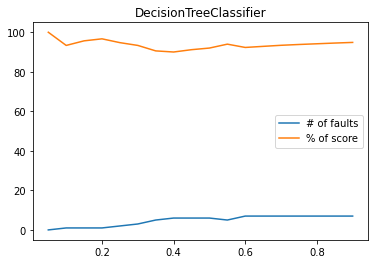

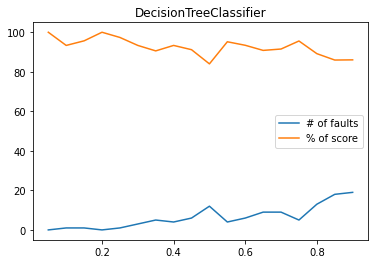

In [202]:
for splitter in ['best', 'random']:
    test_results = estimate_clf(clf(splitter=splitter))
    show_result(clf, test_results)

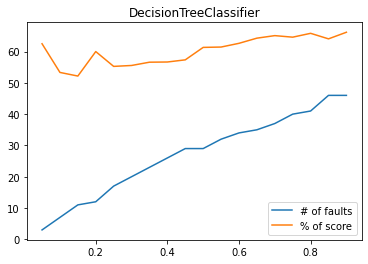

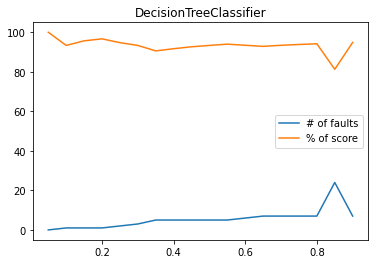

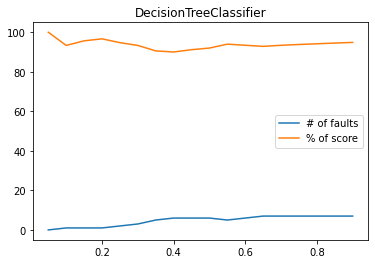

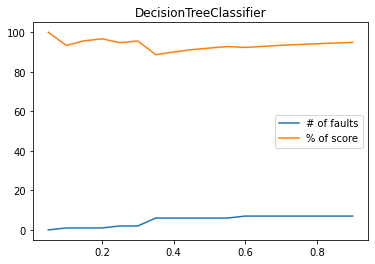

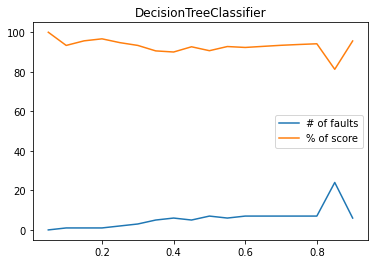

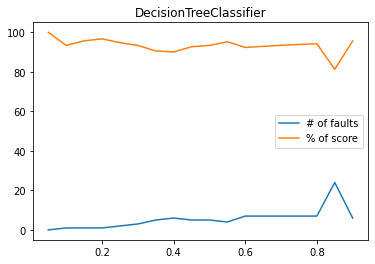

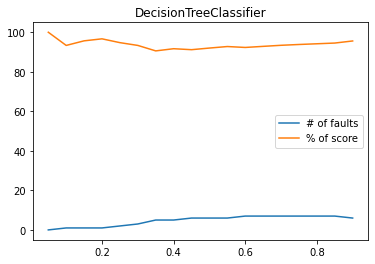

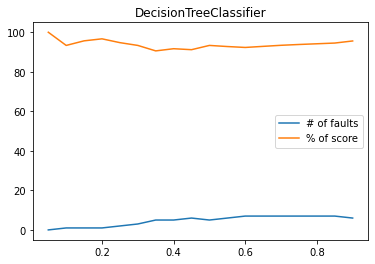

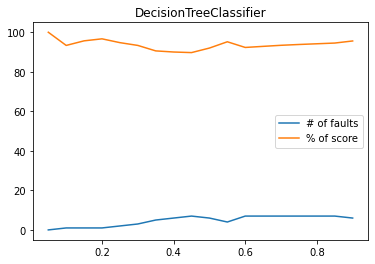

In [206]:
for max_depth in range(1, 10):
    test_results = estimate_clf(clf(max_depth=max_depth))
    show_result(clf, test_results)

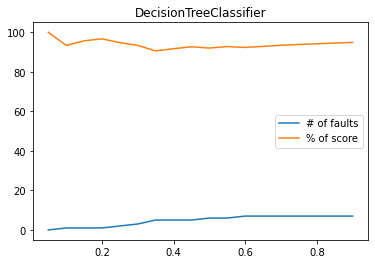

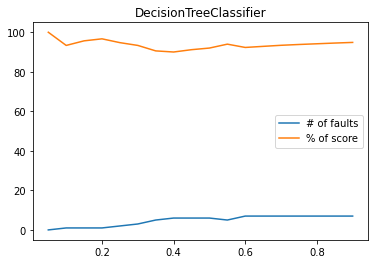

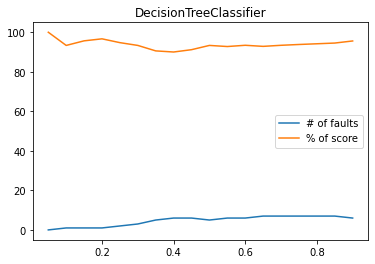

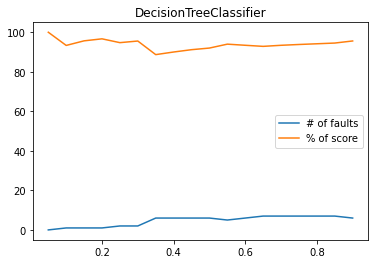

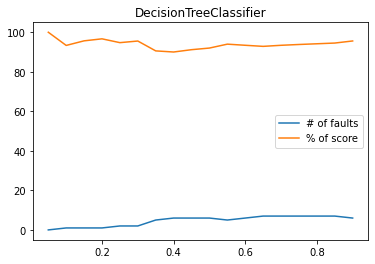

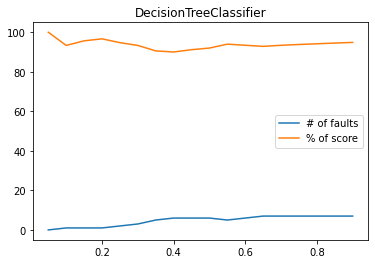

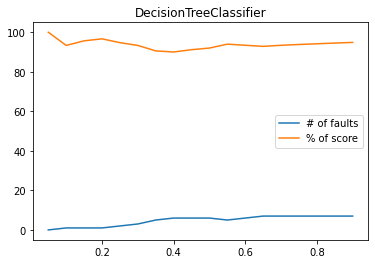

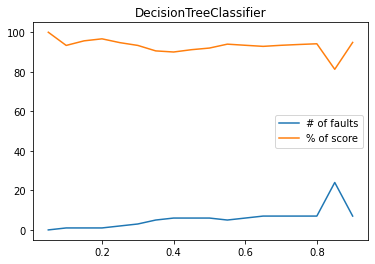

In [207]:
for min_samples_split in range(2, 10):
    test_results = estimate_clf(clf(min_samples_split=min_samples_split))
    show_result(clf, test_results)

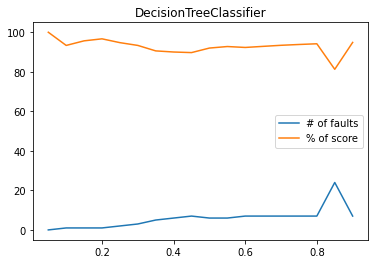

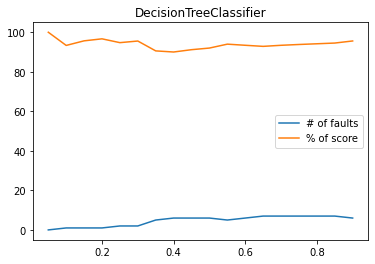

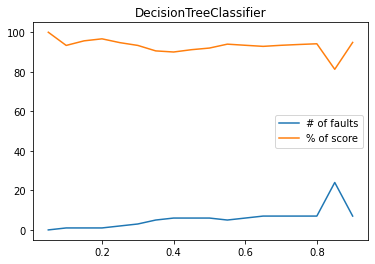

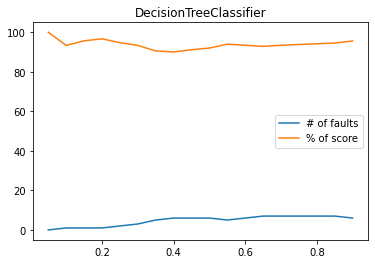

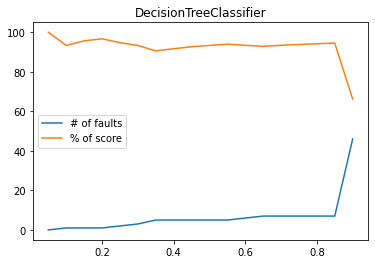

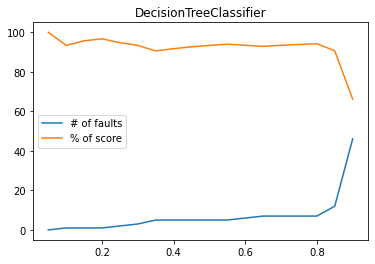

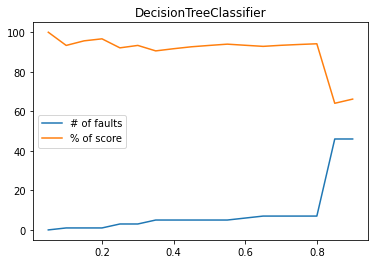

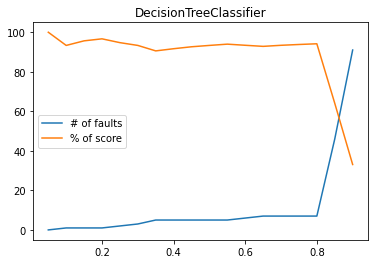

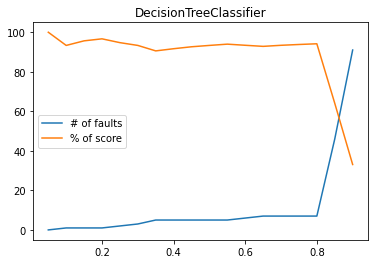

In [208]:
for min_samples_leaf in range(1, 10):
    test_results = estimate_clf(clf(min_samples_leaf=min_samples_leaf))
    show_result(clf, test_results)